# Outliers detection and handling

1. Import required libraries and load the dataset into your environment.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\abhis\Documents\Machine learning\weight-height.csv")

In [4]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,169.034243,163.852461


2. Display the shape of the dataset.

In [5]:
df.shape

(10000, 3)

3. Visualize the data distribution (height feature) using box-plot or histograms.

<Axes: >

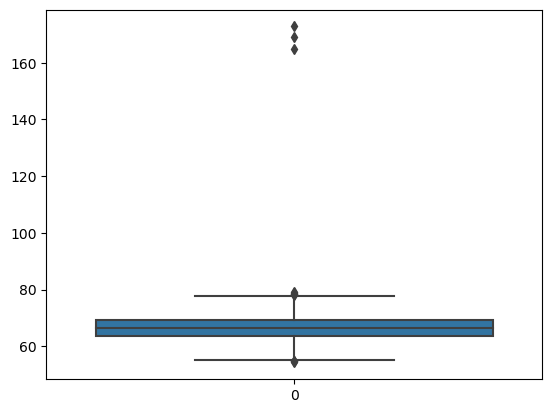

In [6]:
sns.boxplot(df.Height)

4. Compute and dispaly the 1st (Q1), 2nd (Q2/median), and 3rd (Q3) quartiles of the height

In [8]:
Q1 = df.Height.quantile(0.25)
Q2=df.Height.median()
Q3 = df.Height.quantile(0.75)
Q1, Q3, Q2

(63.505620480000005, 69.1799135425, 66.31916067)

5. Calculate the Z-score for each data point and identify outliers by setting a threshold of 3.

In [14]:
df['zscore'] = ( df.Height - df.Height.mean() ) / df.Height.std()
df

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.758191
1,Male,68.781904,162.310473,0.562743
2,Male,74.110105,212.740856,1.820284
3,Male,71.730978,220.042470,1.258772
4,Male,69.881796,206.349801,0.822336
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.053082
9996,Female,67.067155,170.867906,0.158035
9997,Female,63.867992,128.475319,-0.597018
9998,Female,169.034243,163.852461,24.223901


In [15]:
df[df['zscore']>3]

,Gender,Height,Weight,zscore
27,Male,172.800844,206.828189,25.112879
93,Male,164.731926,177.549263,23.208485
9998,Female,169.034243,163.852461,24.223901


In [16]:
df_new_zscore = df[df.zscore<3]
df_new_zscore.shape

(9997, 4)

6. Find IQR and handle outliers by using a IQR, replacing data points outside the calculated limits.

In [13]:
Q1 = df.Height.quantile(0.25)
Q2=df.Height.median()
Q3 = df.Height.quantile(0.75)
Q1, Q3, Q2

(63.505620480000005, 69.1799135425, 66.31916067)

In [17]:
IQR=Q3-Q1
IQR

5.6742930624999985

In [20]:
LL = Q1 - 1.5*IQR
UL = Q3 + 1.5*IQR
UL, LL

(77.69135313625, 54.99418088625001)

In [21]:
df

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.758191
1,Male,68.781904,162.310473,0.562743
2,Male,74.110105,212.740856,1.820284
3,Male,71.730978,220.042470,1.258772
4,Male,69.881796,206.349801,0.822336
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.053082
9996,Female,67.067155,170.867906,0.158035
9997,Female,63.867992,128.475319,-0.597018
9998,Female,169.034243,163.852461,24.223901


In [22]:
df[(df.Height<LL)| (df.Height>UL)]

,Gender,Height,Weight,zscore
27,Male,172.800844,206.828189,25.112879
93,Male,164.731926,177.549263,23.208485
994,Male,78.095867,255.690835,2.760988
1317,Male,78.462053,227.342565,2.847414
2014,Male,78.998742,269.989698,2.974081
3285,Male,78.528210,253.889004,2.863028
3757,Male,78.621374,245.733783,2.885016
6624,Female,54.616858,71.393749,-2.780434
7294,Female,54.873728,78.606670,-2.719809
9285,Female,54.263133,64.700127,-2.863919


In [23]:
df_new_IQR = df[(df.Height>LL)&(df.Height<UL)]
df_new_IQR.shape

(9989, 4)

In [24]:
df1 = df
df1

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.758191
1,Male,68.781904,162.310473,0.562743
2,Male,74.110105,212.740856,1.820284
3,Male,71.730978,220.042470,1.258772
4,Male,69.881796,206.349801,0.822336
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.053082
9996,Female,67.067155,170.867906,0.158035
9997,Female,63.867992,128.475319,-0.597018
9998,Female,169.034243,163.852461,24.223901


7. Apply label encoding to the variable Gender

In [25]:
from sklearn.preprocessing import LabelEncoder
df_labelencoding = df1
label_encoder = LabelEncoder() 
df_labelencoding['Gender']=label_encoder.fit_transform(df_labelencoding['Gender'])


In [26]:
df_labelencoding

,Gender,Height,Weight,zscore
0,1,73.847017,241.893563,1.758191
1,1,68.781904,162.310473,0.562743
2,1,74.110105,212.740856,1.820284
3,1,71.730978,220.042470,1.258772
4,1,69.881796,206.349801,0.822336
...,...,...,...,...
9995,0,66.172652,136.777454,-0.053082
9996,0,67.067155,170.867906,0.158035
9997,0,63.867992,128.475319,-0.597018
9998,0,169.034243,163.852461,24.223901


8. Apply one-hot encoding for variable Gender

In [28]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False)
df_onehotconding = df
encoded_data = onehot_encoder.fit_transform(df_onehotconding[['Gender']])
df_encoded = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out(['Gender']))

df_V = df_onehotconding.join(df_encoded)
df_encoded

,Gender_0,Gender_1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
9995,1.0,0.0
9996,1.0,0.0
9997,1.0,0.0
9998,1.0,0.0


In [29]:
df_V

,Gender,Height,Weight,zscore,Gender_0,Gender_1
0,1,73.847017,241.893563,1.758191,0.0,1.0
1,1,68.781904,162.310473,0.562743,0.0,1.0
2,1,74.110105,212.740856,1.820284,0.0,1.0
3,1,71.730978,220.042470,1.258772,0.0,1.0
4,1,69.881796,206.349801,0.822336,0.0,1.0
...,...,...,...,...,...,...
9995,0,66.172652,136.777454,-0.053082,1.0,0.0
9996,0,67.067155,170.867906,0.158035,1.0,0.0
9997,0,63.867992,128.475319,-0.597018,1.0,0.0
9998,0,169.034243,163.852461,24.223901,1.0,0.0
